Данный код предназначен для первоначальной тестовой прогонки моделей для поиска оптимального решения задачи

Особых пояснений здесь не будет

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

import classification as clsf

In [3]:
import data_processing as dprcs
import task_read as tsk
import dataset_open as dst

In [4]:
tsk.task_describe()

В качестве испытания представлен набор данных Mechanical Data Set. В архиве находятся:
Файл с набором данных.
Файл с записями из набора данных, не включенными в основной набор (обычно - не используются).
Файл с описанием набора данных (английский язык, можно воспользоваться любым удобным переводчиком).
Набор данных описывает результаты контроля состояния электро-механического оборудования (насосов) с применением методов вибрационной диагностики. В качестве выходного параметра рассматривается состояние, характеризующееся либо полной исправностью, либо одной или несколькими неисправностями (подробно – в файле с описанием). Таким образом – решается задача классификации.
Необходимо:
Ознакомиться с описанием набора данных, дать краткую интерпретацию смыслового содержания. Пояснить атрибуты (входные параметры) и возможные классы состояний диагностируемых объектов.
Ознакомиться с файлом с данными, дать краткую характеристику структуре представления данных в нем.
Сформировать (разработать) и к

In [5]:
tsk = tsk.dataset_describe()

1. Title of Database: Mechanical analysis
-- diagnosis of faults in electro-machanical devices from vibration
measurements

2. Sources:
(a) Original owners of database:

F. Bergadano, A. Giordana, L. Saitta
University of Torino, Italy
Corso Svizzera 185, Torino - tel. (39) 11 7712002
e-mail: bergadan@itoinfo.bitnet

F. Bracadori, D. De Marchi
Sogesta, Localita' Crocicchio, Urbino, Italy

(b) Donor of database: Enichem (Eni), Ravenna through Sogesta (Eni), Urbino.
(c) Date received: June 1990
3. Past Usage:
(a) F. Bergadano, A. Giordana, L. Saitta, F. Brancadori, D. De Marchi:
"Integrated Learning in a real Domain"
Proc. VII ML Conference, Austin TX, 1990 (pages 322-329)
(b) Indication of what attribute(s) were being predicted: class.
(c) Indication of study's results: results are described in the paper.
4. Relevant Information Paragraph:
-- F. Bergadano supplied this database.  Each instance contains many
components, each of which has 8 attributes.  Different instances
in this database

In [6]:
dst.dataset_prepare();
data = dst.dataset_open()
data

Отсутствие класса: {72} 74


,0,1,2,3,4,5,6,7,8,9,10,categ_7,categ_7_1,categ_7_2,categ_7_3
0,1,1,0,3,0,120.00,21.0,ao,1000,1,7,"['no filter', 'amplitude', 'horizontal']",no filter,amplitude,horizontal
1,1,1,1,3,0,55.00,7.5,aa,1000,1,7,"['no filter', 'amplitude', 'axial']",no filter,amplitude,axial
2,1,1,2,3,0,26.00,1.4,vo,1000,1,7,"['no filter', 'velocity', 'horizontal']",no filter,velocity,horizontal
3,1,1,3,3,0,11.00,0.8,va,1000,1,7,"['no filter', 'velocity', 'axial']",no filter,velocity,axial
4,1,1,4,2,0,7.00,5.5,ao,1000,1,7,"['no filter', 'amplitude', 'horizontal']",no filter,amplitude,horizontal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221,6,"['filter', 'velocity', 'horizontal']",filter,velocity,horizontal
9250,1,6,36,3,30000,0.70,0.0,io,1500,221,6,"['filter', 'velocity', 'horizontal']",filter,velocity,horizontal
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221,6,"['filter', 'velocity', 'vertical']",filter,velocity,vertical
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221,6,"['filter', 'velocity', 'vertical']",filter,velocity,vertical


In [7]:
data.info()
## И прочие values_count и т.д.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          9254 non-null   int64  
 1   1          9254 non-null   int64  
 2   2          9254 non-null   int64  
 3   3          9254 non-null   int64  
 4   4          9254 non-null   int64  
 5   5          9254 non-null   float64
 6   6          9254 non-null   float64
 7   7          9254 non-null   object 
 8   8          9254 non-null   int64  
 9   9          9254 non-null   int64  
 10  10         9180 non-null   object 
 11  categ_7    9254 non-null   object 
 12  categ_7_1  9254 non-null   object 
 13  categ_7_2  9254 non-null   object 
 14  categ_7_3  9254 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 1.1+ MB


In [8]:
data.isna().sum(), data.fillna('-1', inplace=True)

(0             0
 1             0
 2             0
 3             0
 4             0
 5             0
 6             0
 7             0
 8             0
 9             0
 10           74
 categ_7       0
 categ_7_1     0
 categ_7_2     0
 categ_7_3     0
 dtype: int64,
 None)

In [9]:
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,categ_7,categ_7_1,categ_7_2,categ_7_3
7607,1,4,36,3,12000,1.60,0.0,ia,3000,172,"(3, 4)","['filter', 'velocity', 'axial']",filter,velocity,axial
6419,1,3,34,2,28000,2.00,0.9,io,3000,146,3,"['filter', 'velocity', 'horizontal']",filter,velocity,horizontal
1641,1,1,35,3,27000,0.25,0.0,ia,3000,40,7,"['filter', 'velocity', 'axial']",filter,velocity,axial
7289,1,4,48,4,20000,1.10,0.0,io,3000,164,4,"['filter', 'velocity', 'horizontal']",filter,velocity,horizontal
350,1,4,9,3,0,2.80,0.0,va,3000,10,7,"['no filter', 'velocity', 'axial']",no filter,velocity,axial


In [10]:
data['1'].value_counts()

2    3194
1    2931
6     967
4     773
3     720
5     669
Name: 1, dtype: int64

In [11]:
data['10'].value_counts()

7         1789
10        1487
8         1134
2          996
6          901
1          611
5          436
9          434
3          269
(1, 2)     228
4          196
(2, 7)     130
(5, 7)     108
(1, 3)      88
-1          74
(1, 8)      62
(1, 5)      62
(1, 9)      58
(4, 8)      58
(4, 9)      46
(3, 7)      46
(3, 4)      41
Name: 10, dtype: int64

Не ясно, целевой столбец класса - 1 или 10, поскольку оба вроде как про классы. Поэтому будем тестировать на обоих

##### В начале построим самую простую модель на основании изначально имеющихся признаков.

Классов у нас много, поэтому на данный момент в качестве метрики используем 'accuracy'.

In [12]:
null_field = ['0']
number_fields = ['4', '5', '6', '8']
categ_fields = ['2', '3', '7', '9', '10']
target_field = '10'

In [13]:
labelencoder = LabelEncoder()

def define_x_y_label_encoder(data):
    data_label = data.copy()
    for i in categ_fields:
        data_label[f'label_code_{i}'] = labelencoder.fit_transform(data_label[i].values)
    label_fields = [f'label_code_{i}' for i in categ_fields if i!=target_field]
#     X, y = data_label[number_fields], data_label[target_field]
    X, y = data_label[number_fields + label_fields], labelencoder.fit_transform(data_label[target_field])
    return X, y

X, y = define_x_y_label_encoder(data)

In [14]:
X.sample(3)

,4,5,6,8,label_code_2,label_code_3,label_code_7,label_code_9
6140,0,2.75,0.0,1500,6,2,0,133
2193,0,2.10,0.0,3000,13,3,2,49
6598,0,2.55,0.0,3000,10,4,8,142


In [15]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}

Проанализируем данные с помощью метода главных компонент PCA

Вот это надо в подробный отчет

In [16]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FFFF0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            np.array(X)[y==l, 0],
            np.array(X)[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

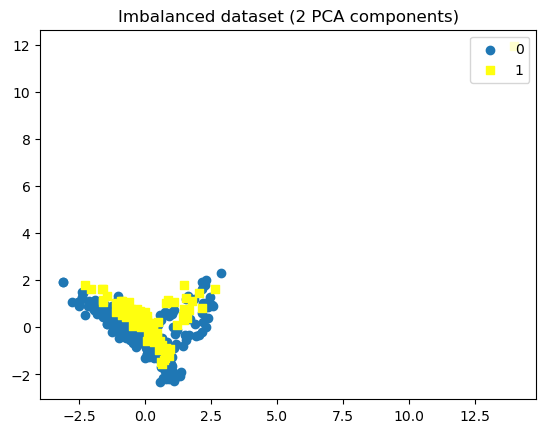

In [17]:
X_scaled = StandardScaler().fit_transform(X)

border = 0.9
pca_cmsm_vr = np.cumsum(PCA().fit(X_scaled).explained_variance_ratio_)
pca = PCA(n_components = pca_cmsm_vr.shape[0] - pca_cmsm_vr[pca_cmsm_vr>border].shape[0])
X_pca = pca.fit_transform(X_scaled)
plot_2d_space(X_pca, y, 'Imbalanced dataset (2 PCA components)')

In [18]:
X_pca[0].shape[0]

6

In [19]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))

1 component: 21.3% of initial variance
2 component: 16.52% of initial variance
3 component: 14.49% of initial variance
4 component: 11.73% of initial variance
5 component: 11.19% of initial variance
6 component: 10.64% of initial variance


Построим классификацию

In [21]:
results = clsf.test_classification_models(X, y)
sorted(results, key=lambda x:-x[2])[:5]

[('DecisionTreeClassifier',
  DecisionTreeClassifier(class_weight='balanced', random_state=71),
  0.503660782338254,
  1.0,
  1.2499496936798096),
 ('LGBMClassifier',
  LGBMClassifier(is_unbalance=True),
  0.46032788704425653,
  0.9995678478824547,
  9.215817928314209),
 ('RandomForestClassifier',
  RandomForestClassifier(class_weight='balanced', random_state=71),
  0.4125575364667748,
  0.7653414001728609,
  2.797964572906494),
 ('AdaBoostClassifier',
  AdaBoostClassifier(random_state=71),
  0.371500109509834,
  0.4550561797752809,
  1.5371389389038086),
 ('KNeighborsClassifier',
  KNeighborsClassifier(),
  0.3160665235738169,
  0.5613656006914434,
  0.19934463500976562)]

Результаты неудовлетворительные. 

#### Усложним модель
Добавим категории из столбца 7 - dir - filter, type of the measure and direction.

In [22]:
null_field = ['0']
number_fields = ['4', '5', '6', '8']
categ_fields = ['2', '3', '7', '9', '10'] + ['categ_7_1', 'categ_7_2', 'categ_7_3']
# target_fields = [1, 10]
target_field = '10'

In [23]:
X, y = define_x_y_label_encoder(data)

In [24]:
X.sample(3)

,4,5,6,8,label_code_2,label_code_3,label_code_7,label_code_9,label_code_categ_7_1,label_code_categ_7_2,label_code_categ_7_3
5274,24000,1.0,0.0,1500,25,3,4,116,0,2,1
8943,1500,0.5,0.0,1500,26,2,5,200,0,2,3
6422,6000,1.8,1.5,3000,37,3,4,138,0,2,1


In [25]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}

In [26]:
results = clsf.test_classification_models(X, y, metric="accuracy")
sorted(results, key=lambda x:-x[2])[:5]

[('DecisionTreeClassifier',
  DecisionTreeClassifier(class_weight='balanced', random_state=71),
  0.503660782338254,
  1.0,
  0.0651400089263916),
 ('LGBMClassifier',
  LGBMClassifier(is_unbalance=True),
  0.46032788704425653,
  0.9995678478824547,
  7.6550891399383545),
 ('RandomForestClassifier',
  RandomForestClassifier(class_weight='balanced', random_state=71),
  0.4128814519543855,
  0.7614520311149524,
  2.517502784729004),
 ('AdaBoostClassifier',
  AdaBoostClassifier(random_state=71),
  0.371500109509834,
  0.4550561797752809,
  1.5796453952789307),
 ('KNeighborsClassifier',
  KNeighborsClassifier(),
  0.3193082482806956,
  0.5613656006914434,
  0.2070450782775879)]

Показатели снова не очень высокие

#### Усложним модель
Закодируем переменные с помощью one-hot кодирования

In [27]:
def dummies(data): # One-hot encoding
    data_dummies = data.copy()
    categ_fields = ['2', '3', '7', '9']  + ['categ_7', 'categ_7_1', 'categ_7_2', 'categ_7_3']
    data_dummies = pd.get_dummies(data_dummies, drop_first=True, columns=categ_fields)
    return data_dummies

In [28]:
data_dummies = dummies(data)
data_dummies

,0,1,4,5,6,8,10,2_1,2_2,2_3,...,"categ_7_['no filter', 'velocity', 'horizontal']","categ_7_['no filter', 'velocity', 'vertical']",categ_7_ma,categ_7_1_ma,categ_7_1_no filter,categ_7_2_ma,categ_7_2_velocity,categ_7_3_horizontal,categ_7_3_ma,categ_7_3_vertical
0,1,1,0,120.00,21.0,1000,7,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,1,0,55.00,7.5,1000,7,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,26.00,1.4,1000,7,0,1,0,...,1,0,0,0,1,0,1,1,0,0
3,1,1,0,11.00,0.8,1000,7,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,1,1,0,7.00,5.5,1000,7,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,27000,0.65,0.0,1500,6,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9250,1,6,30000,0.70,0.0,1500,6,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9251,1,6,32000,0.60,0.0,1500,6,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9252,1,6,1500,0.60,0.0,1500,6,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
# data_dummies[target_field] = labelencoder.fit_transform(data_dummies[target_field].values)
# data_dummies

In [30]:
X = data_dummies.drop(["1", "10"], axis=1)
y = data_dummies["10"]

In [31]:
X

,0,4,5,6,8,2_1,2_2,2_3,2_4,2_5,...,"categ_7_['no filter', 'velocity', 'horizontal']","categ_7_['no filter', 'velocity', 'vertical']",categ_7_ma,categ_7_1_ma,categ_7_1_no filter,categ_7_2_ma,categ_7_2_velocity,categ_7_3_horizontal,categ_7_3_ma,categ_7_3_vertical
0,1,0,120.00,21.0,1000,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,55.00,7.5,1000,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,26.00,1.4,1000,0,1,0,0,0,...,1,0,0,0,1,0,1,1,0,0
3,1,0,11.00,0.8,1000,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,7.00,5.5,1000,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,1,27000,0.65,0.0,1500,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9250,1,30000,0.70,0.0,1500,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9251,1,32000,0.60,0.0,1500,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9252,1,1500,0.60,0.0,1500,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


Признаков много. Проведем отбор признаков с помощью RandomForestClassifier.

Для числовых признаков в виду их значимости зададим новые столбцы:

In [32]:
for col in number_fields:
    X[f'{col}_log'] = X[col].apply(lambda x: math.log10(x) if x>0 else -100)
    X[f'{col}_square'] = X[col].apply(lambda x: x**2)
    X[f'{col}_root'] = X[col].apply(lambda x: x**(1/2))
X.sample(3)

,0,4,5,6,8,2_1,2_2,2_3,2_4,2_5,...,4_root,5_log,5_square,5_root,6_log,6_square,6_root,8_log,8_square,8_root
4739,1,36000,4.0,0.0,3000,0,0,0,0,0,...,189.73666,0.602060,16.00,2.000000,-100.0,0.0,0.0,3.477121,9000000,54.772256
2802,1,0,2.3,0.0,3000,0,0,0,1,0,...,0.00000,0.361728,5.29,1.516575,-100.0,0.0,0.0,3.477121,9000000,54.772256
278,1,0,86.0,0.0,1500,0,0,0,1,0,...,0.00000,1.934498,7396.00,9.273618,-100.0,0.0,0.0,3.176091,2250000,38.729833


In [33]:
def rfc_feature(X, y, count):
    n_estimators = min(len(X.columns), 3*count)
    model = RandomForestClassifier(n_estimators = n_estimators)
    model.fit(X, y)
    importances = model.feature_importances_
    feature_df = pd.DataFrame({"Features" : pd.DataFrame(X).columns, "Importances" : importances})
    feature_col = feature_df.sort_values('Importances', ascending=False)[:count].sort_values("Features").Features
    return X[feature_col.values]

In [34]:
X = rfc_feature(X, y, 100)

Обработаем данные (масштабирование, PCA и пр.)

In [35]:
X, y = dprcs.preprocessing(X, y)

Посмотрим на результаты тестирования моделей

In [36]:
results = clsf.test_classification_models(X, y)
sorted(results, key=lambda x:-x[2])[:7]

[('RandomForestClassifier',
  RandomForestClassifier(class_weight='balanced', random_state=71),
  0.9010880445920136,
  0.904979674796748,
  31.803602695465088),
 ('LGBMClassifier',
  LGBMClassifier(is_unbalance=True),
  0.8999955229550073,
  0.9037601626016261,
  40.38751435279846),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(class_weight='balanced', random_state=71),
  0.8965400511861491,
  0.9003048780487805,
  2.7219290733337402),
 ('KNeighborsClassifier',
  KNeighborsClassifier(),
  0.8926526817596342,
  0.8983739837398373,
  27.68387460708618),
 ('LogisticRegression',
  LogisticRegression(class_weight='balanced', random_state=71),
  0.784008750605547,
  0.8007113821138211,
  15.781559467315674),
 ('LinearSVC',
  LinearSVC(class_weight='balanced', random_state=71),
  0.7619290783136201,
  0.7770325203252032,
  12.892534971237183),
 ('SGDClassifier',
  SGDClassifier(class_weight='balanced', random_state=71),
  0.7269676338374996,
  0.7259146341463415,
  2.10786509513855)]

Показатели хорошие. Что и требовалось получить.

##### Проверим построенные модели на предсказание наличия/отсутствия поломки.

Вспомним, что кроме всего прочего нам надо определить наличие поломки и посчитать roc-auc. 
Проверим построенную модель на двухклассовой классификации наличие/отсутствие поломки.

Проверим результат на отдельном датасете

In [37]:
# dst.dataset_open()

In [38]:
file_name = 'mechanical-analysis.notused-instances.txt'
dst.dataset_prepare(file_name)
df = dst.dataset_open(file_name)
df

Отсутствие класса: {32, 33, 66, 194, 69, 167, 8, 203, 12, 208, 152} 523


,0,1,2,3,4,5,6,7,8,9,10,categ_7,categ_7_1,categ_7_2,categ_7_3
0,1,1,0,4,0,7.00,0.0,ao,1500,8,NaN,"['no filter', 'amplitude', 'horizontal']",no filter,amplitude,horizontal
1,1,1,1,4,0,21.50,0.0,aa,1500,8,NaN,"['no filter', 'amplitude', 'axial']",no filter,amplitude,axial
2,1,1,2,4,0,1.95,0.0,vo,1500,8,NaN,"['no filter', 'velocity', 'horizontal']",no filter,velocity,horizontal
3,1,1,3,4,0,3.80,0.0,va,1500,8,NaN,"['no filter', 'velocity', 'axial']",no filter,velocity,axial
4,1,1,4,3,0,9.00,0.0,ao,1500,8,NaN,"['no filter', 'amplitude', 'horizontal']",no filter,amplitude,horizontal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,1,6,51,3,12500,0.65,0.0,iv,3000,208,NaN,"['filter', 'velocity', 'vertical']",filter,velocity,vertical
557,1,6,52,3,16000,0.65,0.0,iv,3000,208,NaN,"['filter', 'velocity', 'vertical']",filter,velocity,vertical
558,1,6,53,3,18000,0.30,0.0,io,3000,208,NaN,"['filter', 'velocity', 'horizontal']",filter,velocity,horizontal
559,1,6,54,3,18000,0.65,0.0,iv,3000,208,NaN,"['filter', 'velocity', 'vertical']",filter,velocity,vertical


In [39]:
unite_data = pd.concat([data, df])

In [40]:
X, y = dprcs.prepare_X_y(unite_data, target_field='1')

In [41]:
y.value_counts()

0    8709
1    1106
Name: 1, dtype: int64

In [42]:
X_data, y_data = X[:len(data)], y[:len(data)]
X_df, y_df = X[len(data):], y[len(data):]

In [43]:
results = clsf.test_classification_models(X_data, y_data, metric='roc_auc')

Only one class present in y_true. ROC AUC score is not defined in that case.
Only one class present in y_true. ROC AUC score is not defined in that case.


In [44]:
results = sorted(results, key=lambda x:-x[2])[:5]
results

[('RidgeClassifier',
  RidgeClassifier(class_weight='balanced', random_state=71),
  0.8575936416831788,
  0.9979166666666667,
  0.5698788166046143),
 ('RandomForestClassifier',
  RandomForestClassifier(class_weight='balanced', random_state=71),
  0.8570443059735939,
  0.9568145269364782,
  3.2450408935546875),
 ('AdaBoostClassifier',
  AdaBoostClassifier(random_state=71),
  0.8520890065592475,
  1.0,
  5.032137155532837),
 ('LGBMClassifier',
  LGBMClassifier(is_unbalance=True),
  0.8258849951124307,
  0.9950757759751301,
  1.1622705459594727),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(class_weight='balanced', random_state=71),
  0.7389117210287203,
  0.9917695473251029,
  0.4909327030181885)]

Посмотрим на 'лучшую' модель:

In [45]:
X_resample, y_resample = clsf.preprocessing(X, y)
X_data, y_data = X_resample[:len(data)], y_resample[:len(data)]
X_df, y_df = X_resample[len(data):], y_resample[len(data):]

In [46]:
model = results[0][1]
print(model)
model.fit(X_data, y_data)

RidgeClassifier(class_weight='balanced', random_state=71)


RidgeClassifier(class_weight='balanced', random_state=71)

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      8287
           1       0.27      0.69      0.38       967

    accuracy                           0.77      9254
   macro avg       0.61      0.74      0.62      9254
weighted avg       0.88      0.77      0.81      9254

precision_score 0.26626984126984127
recall_score 0.6938986556359876
accuracy_score 0.7682083423384483
balanced_accuracy_score 0.7353890526882725
f1_score 0.3848580441640379
roc_auc_score 0.7353890526882726
cohen_kappa_score 0.2754219033548363

Confusion matrix
col_0     0     1
row_0            
0      6438  1849
1       296   671


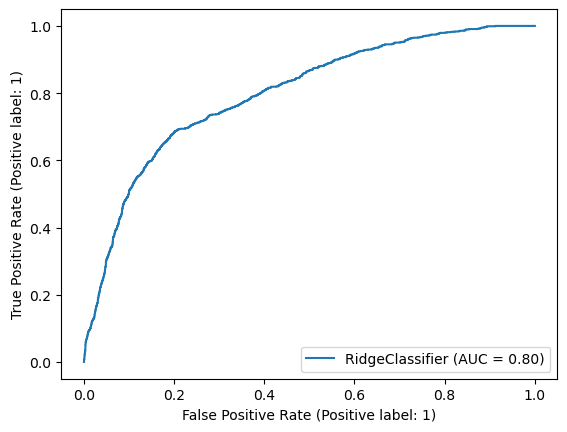

In [47]:
clsf.get_classification_report('TRAIN REPORT', model, X_data, y_data, model.predict(X_data))

TEST REPORT
              precision    recall  f1-score   support

           0       0.10      0.85      0.19       422
           1       0.99      0.60      0.75      7742

    accuracy                           0.61      8164
   macro avg       0.55      0.73      0.47      8164
weighted avg       0.94      0.61      0.72      8164

precision_score 0.9868393122479304
recall_score 0.6004908292430896
accuracy_score 0.613547280744733
balanced_accuracy_score 0.7267856989817344
f1_score 0.7466473942022003
roc_auc_score 0.7267856989817343
cohen_kappa_score 0.10319037164505296

Confusion matrix
col_0     0     1
row_0            
0       360    62
1      3093  4649


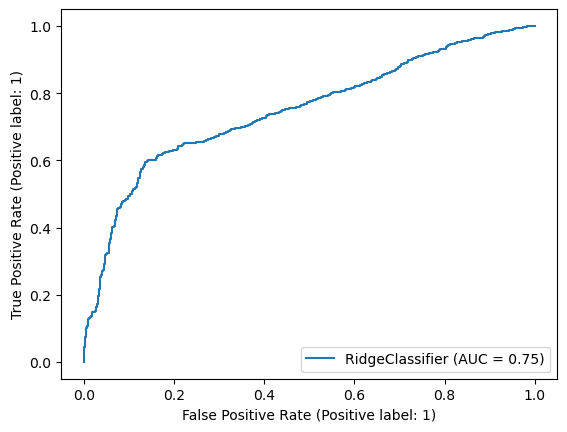

In [48]:
clsf.get_classification_report('TEST REPORT', model, X_df, y_df, model.predict(X_df))

Показатели хорошие. Построим отчеты для остальных моделей.